In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

import os 
path=os.getcwd()+"\desktop\house_price.csv"
df=pd.read_csv(path)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
'''from sklearn.linear_model import LinearRegression
reg=LinearRegression()
x= df.iloc[:,3:22]
#print(x_train)
y=df.price
#print(y_train)
reg.fit(x_train,y_train)
'''

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
from sklearn import preprocessing
x= np.array(df.iloc[:,3:22])
x_norm=(x-x.mean())/(x.max()-x.min())
x_norm

array([[-0.00450924, -0.00451045, -0.00379655, ..., -0.00458509,
        -0.00369967, -0.00108989],
       [-0.00450924, -0.0045097 , -0.00295488, ..., -0.00458513,
        -0.00348774,  0.00011448],
       [-0.00450985, -0.00451045, -0.00404481, ..., -0.00458507,
        -0.00286405,  0.00037062],
       ...,
       [-0.00450985, -0.00451061, -0.00389343, ..., -0.00458511,
        -0.00389343, -0.00329579],
       [-0.00450924, -0.00450955, -0.00354223, ..., -0.00458497,
        -0.00365728, -0.00373176],
       [-0.00450985, -0.00451061, -0.00389343, ..., -0.00458511,
        -0.00389343, -0.00368937]])

In [31]:
x_scale=preprocessing.scale(x)
x_scale

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [35]:
x_scale.mean(axis=0),x_scale.std()

(array([ 2.36705117e-16, -1.78843866e-16,  2.41965231e-16,  1.05202274e-17,
        -3.15606823e-17, -5.26011371e-18, -1.05202274e-17, -2.57745572e-16,
         2.52485458e-16,  1.10462388e-16,  6.83814783e-17,  1.91468139e-15,
         1.31502843e-18, -8.96214887e-14, -3.44626213e-14, -3.63684262e-14,
         8.15317626e-17, -2.89306254e-17]), 1.0)

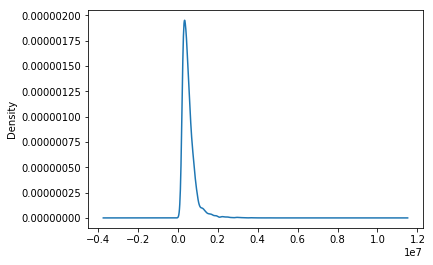

In [37]:
df["price"].plot(kind="kde")

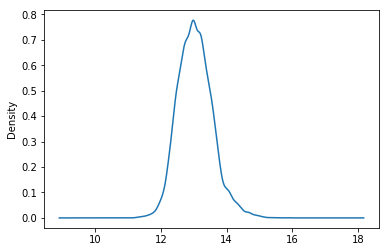

In [38]:
a=np.log(df["price"])
a.plot(kind="kde")

In [42]:
from sklearn.feature_selection import VarianceThreshold
df_num=df.iloc[:,3:22]
selector=VarianceThreshold(0.5)
selector.fit_transform(df_num)

array([[3.0000e+00, 1.0000e+00, 1.1800e+03, ..., 9.8178e+04, 1.3400e+03,
        5.6500e+03],
       [3.0000e+00, 2.2500e+00, 2.5700e+03, ..., 9.8125e+04, 1.6900e+03,
        7.6390e+03],
       [2.0000e+00, 1.0000e+00, 7.7000e+02, ..., 9.8028e+04, 2.7200e+03,
        8.0620e+03],
       ...,
       [2.0000e+00, 7.5000e-01, 1.0200e+03, ..., 9.8144e+04, 1.0200e+03,
        2.0070e+03],
       [3.0000e+00, 2.5000e+00, 1.6000e+03, ..., 9.8027e+04, 1.4100e+03,
        1.2870e+03],
       [2.0000e+00, 7.5000e-01, 1.0200e+03, ..., 9.8144e+04, 1.0200e+03,
        1.3570e+03]])

In [105]:
from sklearn.model_selection import train_test_split
#x_scale.reshape(389034,1)
print(x_scale.shape,a.shape)
#print(x_scale)
x_train,x_test,y_train,y_test=train_test_split(x_scale,a,test_size=0.3,random_state=7)
print( y_train.shape,y_test.shape)

print( x_train.shape,x_test.shape)

(21613, 18) (21613,)
(15129,) (6484,)
(15129, 18) (6484, 18)


In [82]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(normalize=True)
x_train.reshape(272322,1)
#y_train.reshape(272322,1)
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [51]:
reg.intercept_


13.047611596525309

In [52]:
reg.coef_

array([-0.01137053,  0.05462761,  0.06312512,  0.01755266,  0.04163037,
        0.03126315,  0.04586048,  0.0419389 ,  0.18715147,  0.05247446,
        0.03369259, -0.09977432,  0.01506171, -0.03377731,  0.19504434,
       -0.021871  ,  0.06931381, -0.00700808])

In [101]:
y_pred=reg.predict(x_test)
#rint( y_test.shape,y_pred.shape)

In [102]:
df=pd.DataFrame.from_dict({"actual":list(y_test),"predict":list(y_pred)})
df.head()

,actual,predict
0,13.043320,12.840468
1,13.551545,13.404765
2,13.732129,13.320572
3,12.479909,12.464823
4,12.965710,13.014030


In [103]:
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred)

0.06348150185502578

ValueError: x and y must be the same size

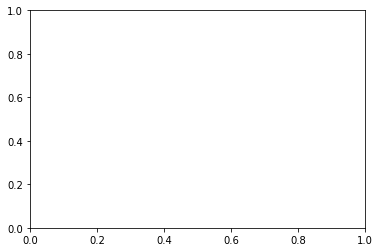

In [113]:
plt.scatter(x_test,y_test,color="black")
plt.plot(x_test,y_pred,color="blue",linewidth=3)
plt.xticks()
plt.yticks()
plt.show()